# $\color{purple}{\text{Understanding Missing Data and How to Deal with It (Part 4)}}$

## $\color{purple}{\text{Common Treatment Practices}}$

### $\color{purple}{\text{Colab Environmental Setup}}$

### $\color{purple}{\text{Libraries for this lesson}}$

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from helpers import stat_comparison

In [6]:
df=pd.read_csv('data/full_set.csv')
df

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,3.169740,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,4.378935,5.034845,4.243867,1.640312,0.269926


In [7]:
mcar_df = pd.read_csv('data/mcar_set.csv')
mcar_df
mar_df = pd.read_csv('data/mar_set.csv')
mar_df


,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,NaN,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,NaN,5.034845,4.243867,1.640312,0.269926


### $\color{purple}{\text{Deletion}}$

#### $\color{purple}{\text{List Deletion}}$
mcar_df.dropna()
#### $\color{purple}{\text{Pair Deletion}}$

In [9]:
cleaned=mar_df.dropna()

stat_comparison(cleaned, df)

In [10]:
stat_comparison( df, cleaned, 'feature a')

,Original,With Missing Data,difference,percentate
mean,2.367217,2.127196,0.240020,10.139349
median,2.380412,2.070274,0.310138,13.028759
stdev,1.280482,1.255276,0.025206,1.968470


### $\color{purple}{\text{Interpolation}}$

#### $\color{purple}{\text{Back Fill/Forward Fill}}$

#### $\color{purple}{\text{Linear Interpolation}}$

#### $\color{purple}{\text{Other Interpolation}}$


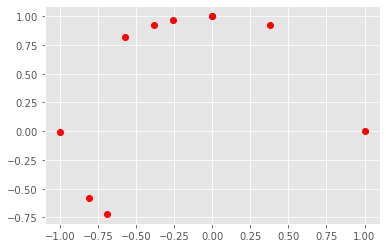

In [11]:

df=pd.read_csv('data/interpolate.csv')
#plt.plot(df.x,df.y,'ro')
plt.plot(df.y, df.z, 'ro')

In [12]:
df.isnull().sum()

index     0
x         0
y        40
z        40
dtype: int64

In [13]:
df['missing']=df.y.isnull().astype(int)

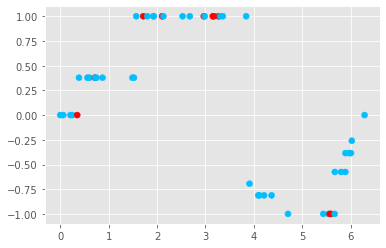

In [14]:
ndf=df.sort_values('x').fillna(method='ffill')
plt.scatter(ndf.x, ndf.y, c=df.missing, cmap=matplotlib.colors.ListedColormap(['red', 'deepskyblue'] ))

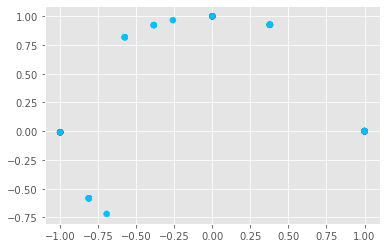

In [15]:
plt.scatter(ndf.y, ndf.z, c=df.missing, cmap=matplotlib.colors.ListedColormap(['red', 'deepskyblue'] ))

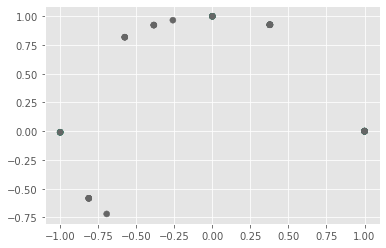

In [16]:
plt.scatter(ndf.y, ndf.z, c=df.missing, cmap='Dark2')

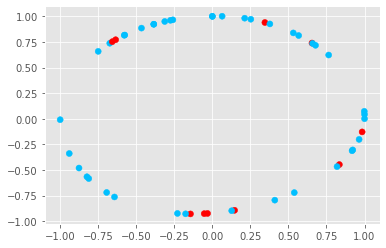

In [17]:
from scipy import interpolate
interpolator_y = interpolate.interp1d(df.dropna().x, df.dropna().y, kind='cubic')
ndf['y']=interpolator_y(ndf.x)
interpolator_z = interpolate.interp1d(df.dropna().x, df.dropna().z, kind='cubic')
ndf['z']=interpolator_z(ndf.x)
plt.scatter(ndf.y, ndf.z, c=df.missing, cmap=matplotlib.colors.ListedColormap(['red', 'deepskyblue']))

### $\color{purple}{\text{Imputation}}$


#### $\color{purple}{\text{Univariate}}$
Mean/Median

Mode/Frequent

Random



* Backfill
* Forward Fill
* Deletion
* Zero Fill
* Mean Fill
* Interpolation
* Imputation

https://www.numpyninja.com/post/mice-algorithm-to-impute-missing-values-in-a-dataset


In [1]:
import autoimpute

In [2]:
from autoimpute.imputations import SingleImputer

In [18]:
%pip install autoimpute

Note: you may need to restart the kernel to use updated packages.


In [3]:
imputer=SingleImputer('mean')

In [8]:
imputations = imputer.fit_transform(mar_df)

In [9]:
imputations

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,2.127196,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,2.127196,5.034845,4.243867,1.640312,0.269926


In [22]:
mar_df

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,NaN,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,NaN,5.034845,4.243867,1.640312,0.269926


In [23]:
mar_df.fillna(mar_df['feature a'].mean())

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,2.127196,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,2.127196,5.034845,4.243867,1.640312,0.269926


In [24]:
mar_df.fillna(mar_df['feature a'].median())

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,2.070274,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,2.070274,5.034845,4.243867,1.640312,0.269926


In [25]:
import numpy as np

In [26]:
filler=np.random.normal(mar_df['feature a'].mean(), mar_df['feature a'].std(), 20000)
mar_df.assign(**{'feature a': mar_df['feature a'].where(~mar_df['feature a'].isnull(), filler)})

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
...,...,...,...,...,...
19995,2.090202,4.966018,1.973792,1.470606,0.666985
19996,4.267743,4.593494,3.159423,1.212630,0.867025
19997,3.704028,4.852749,3.738618,1.153456,0.492664
19998,2.729830,5.034845,4.243867,1.640312,0.269926


In [ ]:
filler

In [ ]:
pd.Series(filler)

In [10]:
import pandas as pd
from scipy.spatial import KDTree

dataA = pd.DataFrame(pd.np.random.rand(100, 100))
dataB = pd.DataFrame(pd.np.random.rand(100, 100))

kdB = KDTree(dataB.values)
print(kdB.query(dataA.values, k=3)[-1]) # k desired number of neighbors 
#returns indices of 3-neighbors for all rows/points in A

[[57 55 59]
 [57  0 61]
 [95  0 90]
 [92 97 72]
 [ 2 60 92]
 [45  3 49]
 [ 4 74 57]
 [18  0 34]
 [49 91 14]
 [21 65 84]
 [87 92 34]
 [23 49 25]
 [ 0  4 73]
 [65 79 37]
 [31 50 45]
 [31 44  0]
 [ 8 12 75]
 [89 19 99]
 [26 50 99]
 [65 91 44]
 [74 30 34]
 [92 61 30]
 [65 17  6]
 [27 18 35]
 [49 91 99]
 [92 78 75]
 [65 12  2]
 [39  7 57]
 [49 88 21]
 [26 27 79]
 [65 22 66]
 [60 16  7]
 [82 17 24]
 [92 98 72]
 [40 63 39]
 [47 59 26]
 [91 92 34]
 [99 47  7]
 [41  2 56]
 [75 31 55]
 [49 57 97]
 [34 57 26]
 [91 42 45]
 [ 4  0 17]
 [25 12 51]
 [13 49 37]
 [17 24 21]
 [85 52 38]
 [51 65 92]
 [77 92 51]
 [21 93 49]
 [ 6 34 57]
 [72 26 60]
 [53 88 99]
 [92 51 88]
 [35 33 78]
 [93 60 75]
 [92  6  4]
 [59 65 60]
 [ 3  2 88]
 [55 18 83]
 [82 14 72]
 [92  0 27]
 [39 31 94]
 [65 45 17]
 [ 6 63 70]
 [ 0 57 17]
 [19 13 12]
 [16 12 99]
 [95 53 51]
 [49 59 84]
 [42 46 92]
 [98 92 23]
 [55 34 99]
 [92 76 51]
 [95 44 12]
 [76 49 71]
 [55 12 26]
 [80 30 55]
 [59  0 21]
 [17 33 57]
 [61 92 77]
 [17 45 69]
 [12

/tmp/ipykernel_29/1890618123.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  dataA = pd.DataFrame(pd.np.random.rand(100, 100))
/tmp/ipykernel_29/1890618123.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  dataB = pd.DataFrame(pd.np.random.rand(100, 100))


In [11]:
dataA

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.683004,0.842989,0.266237,0.648683,0.261475,0.832504,0.761891,0.079262,0.017541,0.040481,...,0.572812,0.539615,0.391721,0.798261,0.126036,0.918296,0.861114,0.978401,0.923142,0.066419
1,0.457329,0.390379,0.895583,0.204552,0.027980,0.387664,0.286895,0.077684,0.821761,0.058882,...,0.047133,0.417133,0.468378,0.059725,0.182933,0.916049,0.940006,0.736412,0.531514,0.733079
2,0.697576,0.693972,0.360712,0.113342,0.059888,0.440656,0.800184,0.243732,0.213707,0.982523,...,0.824692,0.945436,0.591516,0.258922,0.703622,0.504649,0.030490,0.441429,0.849025,0.763153
3,0.926763,0.877876,0.809044,0.560969,0.333480,0.240360,0.641246,0.793389,0.349823,0.885217,...,0.223022,0.491469,0.144941,0.454057,0.169913,0.551089,0.418557,0.845843,0.920083,0.776728
4,0.946310,0.062945,0.561517,0.784073,0.787015,0.154297,0.888195,0.159517,0.746695,0.585437,...,0.614293,0.930794,0.263498,0.322629,0.538952,0.594852,0.458876,0.379786,0.578902,0.682980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333626,0.419037,0.266741,0.760343,0.729322,0.038104,0.939550,0.463494,0.619209,0.649136,...,0.136249,0.970950,0.017969,0.598573,0.647440,0.340475,0.182386,0.488594,0.517530,0.457248
96,0.415911,0.575410,0.477699,0.744426,0.897746,0.322519,0.779643,0.911859,0.894442,0.800403,...,0.060193,0.567808,0.110054,0.381480,0.411198,0.478777,0.792563,0.822098,0.998137,0.194997
97,0.515284,0.864110,0.830668,0.612655,0.778318,0.931567,0.522285,0.387009,0.428921,0.227678,...,0.253271,0.664575,0.560409,0.332722,0.684541,0.146162,0.945822,0.463060,0.928922,0.900573
98,0.113815,0.417212,0.822367,0.017161,0.160390,0.095008,0.498367,0.398238,0.055793,0.786226,...,0.600846,0.036558,0.748253,0.804165,0.643482,0.806887,0.561768,0.427341,0.205827,0.251293


In [13]:
mar_df.head(10)

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
5,2.560068,4.446726,2.420763,0.973363,0.166179
6,4.027199,5.079975,4.582185,0.876607,0.420479
7,NaN,5.339294,3.138633,1.611132,0.229141
8,2.743726,4.506330,2.620240,1.362915,0.011719
9,-0.180238,3.148906,0.280848,-0.741796,0.104471


In [29]:
demo_df = mar_df[0:10].copy()

In [30]:
demo_df

,feature a,feature b,feature c,feature d,uncorrelated
0,1.517509,4.229258,2.052726,0.153278,0.014975
1,2.536323,4.295391,2.104137,1.348000,0.998701
2,4.043034,5.872276,3.559629,3.274061,0.403823
3,0.082752,3.761743,-0.440590,1.031832,0.281023
4,0.196684,3.793343,1.016462,-0.667764,0.165431
5,2.560068,4.446726,2.420763,0.973363,0.166179
6,4.027199,5.079975,4.582185,0.876607,0.420479
7,NaN,5.339294,3.138633,1.611132,0.229141
8,2.743726,4.506330,2.620240,1.362915,0.011719
9,-0.180238,3.148906,0.280848,-0.741796,0.104471


In [31]:
np.linalg.norm((demo_df.iloc[7] - demo_df.iloc[8]).dropna())

1.0351056802748195

In [32]:
def distance(x):
    return np.linalg.norm((x-demo_df.iloc[7]).dropna())
    
demo_df['distance'] = demo_df.apply(distance, axis=1)

In [20]:
import numpy as np

In [36]:
demo_df.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'